In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data generation

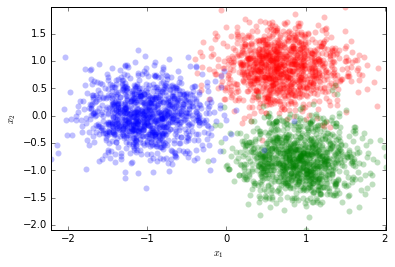

In [2]:
data_size = 3000
data_x_a = np.zeros((data_size / 3, 2))
data_x_b = np.zeros((data_size / 3, 2))
data_x_c = np.zeros((data_size / 3, 2))
data_x = np.zeros((data_size, 2))
data_y = np.zeros((data_size, 3))
for row in range(data_size / 3):
    data_x_a[row] = (np.random.normal(+0.7, .4), np.random.normal(+0.9, .4))
    data_x_b[row] = (np.random.normal(+0.9, .4), np.random.normal(-0.8, .4))
    data_x_c[row] = (np.random.normal(-1.0, .4), np.random.normal(-0.0, .4))
    data_x[3 * row    ] = data_x_a[row]
    data_x[3 * row + 1] = data_x_b[row]
    data_x[3 * row + 2] = data_x_c[row]
    data_y[3 * row    ][0] = 1
    data_y[3 * row + 1][1] = 1
    data_y[3 * row + 2][2] = 1

min_x = np.min(data_x[:,0])
max_x = np.max(data_x[:,0])
min_y = np.min(data_x[:,1])
max_y = np.max(data_x[:,1])

plt.axis((min_x, max_x, min_y, max_y))
plt.plot(data_x_a[:,0], data_x_a[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
plt.plot(data_x_b[:,0], data_x_b[:,1], 'go', markeredgewidth=0.0, alpha=0.25)
plt.plot(data_x_c[:,0], data_x_c[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Design

In [3]:
X  = tf.placeholder(tf.float32, [None, 2])
y  = tf.placeholder(tf.float32, [None, 3])
W = tf.Variable(tf.random_uniform([2, 3], -1.0, 1.0))        
b = tf.Variable(tf.zeros([1]))
hypothesis = tf.matmul(X, W) + b
prob = tf.nn.softmax(hypothesis)
prediction = tf.argmax(prob, 1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
print(X)
print(W)
print(y)
print(prediction)
print(loss)

Tensor("Placeholder:0", shape=(?, 2), dtype=float32)
Tensor("Variable/read:0", shape=(2, 3), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
Tensor("ArgMax:0", shape=(?,), dtype=int64)
Tensor("Mean:0", shape=(), dtype=float32)


# Training and Visualization

iter	loss
1	1.442
100	0.250
200	0.164
300	0.133
400	0.116
500	0.106
600	0.098
700	0.093
800	0.089
900	0.085
1000	0.082


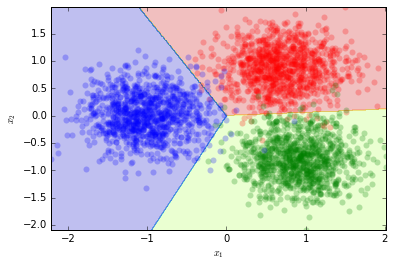

In [4]:
optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.1))
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Fit the model
    sess.run(init)
    print('iter\tloss')
    for i in xrange(1000):
        sess.run(train_op, feed_dict={X:data_x, y:data_y})
        if ((i+1) % 100 == 0) or i == 0:
            print('%d\t%.3f'%(i+1, sess.run(loss, feed_dict={X:data_x, y:data_y})))
    
    # Find the dicision boundary
    h = 0.01
    u, v = np.meshgrid(np.arange(min_x, max_x, h), np.arange(min_y, max_y, h))
    z = sess.run(prob, feed_dict={X:np.column_stack((u.ravel(), v.ravel()))})
    z = np.argmax(z, axis=1) - 1.0
    z = z.reshape(u.shape)
    
    # Print the results
    plt.axis((min_x, max_x, min_y, max_y))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.contourf(u, v, z, cmap=plt.cm.jet_r, alpha=0.25)
    plt.plot(data_x_a[:,0], data_x_a[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
    plt.plot(data_x_b[:,0], data_x_b[:,1], 'go', markeredgewidth=0.0, alpha=0.25)
    plt.plot(data_x_c[:,0], data_x_c[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
    plt.show()